In [1]:
import networkx as nx
import osmnx as ox
import geopandas as gpd

In [2]:
place = "João Pessoa, PB, Brazil"

In [3]:
network_type = "drive"

In [4]:
G = ox.graph_from_place(place, network_type=network_type)

In [5]:
id1 = ox.distance.nearest_nodes(G, -34.86974, -7.10056, return_dist=False);



id2 = ox.distance.nearest_nodes(G, -34.83813, -7.12331, return_dist=False);

In [6]:
trajeto = ox.distance.shortest_path(G, id1, id2, weight='length');

In [7]:
traj = nx.subgraph(G, trajeto)

In [8]:
Gi = nx.Graph(traj);

In [9]:
type(Gi)

networkx.classes.graph.Graph

In [10]:
type(traj)

networkx.classes.multidigraph.MultiDiGraph

In [12]:
gdfs = ox.utils_graph.graph_to_gdfs(traj, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
type(gdfs);

In [47]:
G2 = ox.gdfs_to_graph(nodes, edges)

AttributeError: module 'osmnx' has no attribute 'gdfs_to_graph'

In [18]:
ox.io.save_graph_shapefile(G, filepath=r"C:\Users\firmi\OneDrive\Documentos\grafoteste1.shp", encoding='utf-8', directed=False)

C:\Users\firmi\anaconda3\envs\ox\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


AttributeError: 'Graph' object has no attribute 'lon'

In [28]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

In [32]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'), layer='streets')

C:\Users\firmi\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


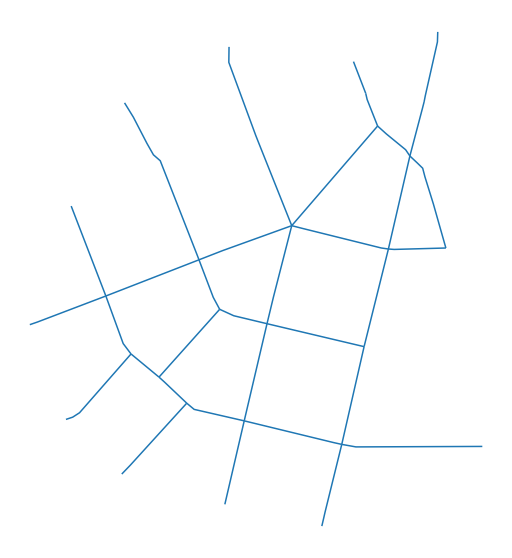

In [33]:
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax)
ax.set_axis_off()
plt.show()



In [34]:
graph = momepy.gdf_to_nx(streets, approach='primal')

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

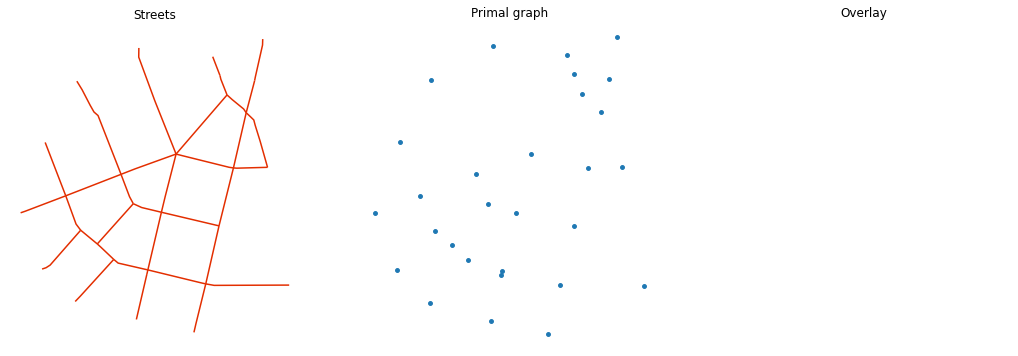

In [35]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
streets.plot(color='#e32e00', ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=15)
streets.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=15)

In [36]:
nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)

KeyError: 'degree'

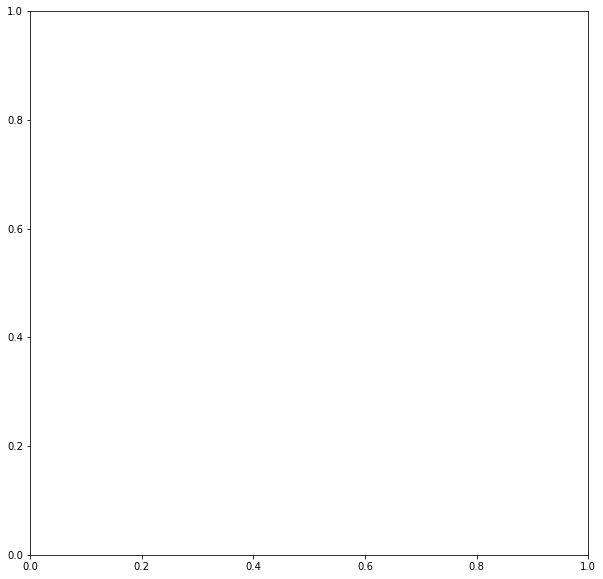

In [37]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='degree', cmap='tab20b', markersize=(nodes['degree'] * 100), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()

In [46]:
nx.write_shp(Gi, r"C:\Users\firmi\OneDrive\Documentos")

TypeError: 'int' object is not subscriptable

In [53]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

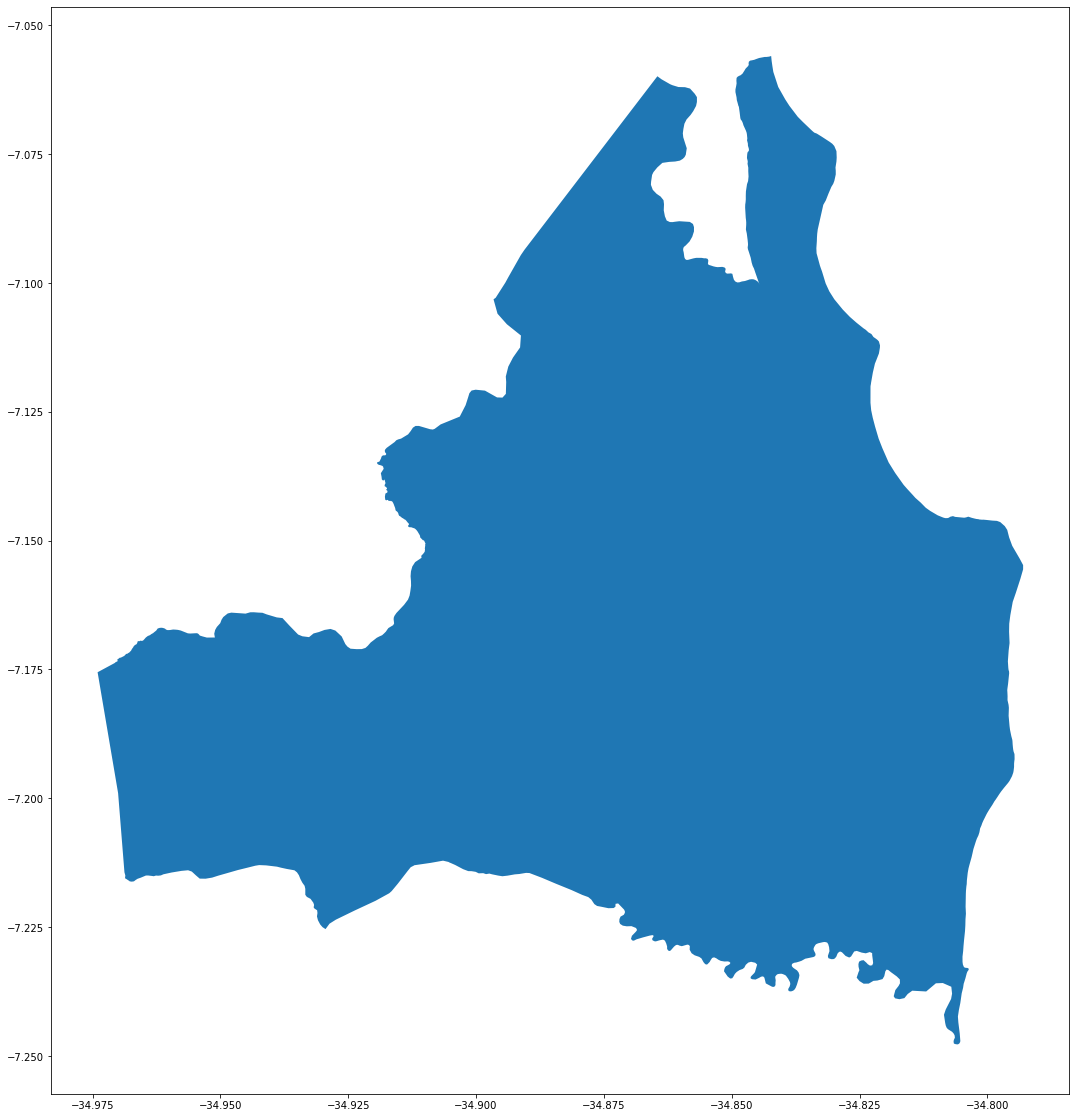

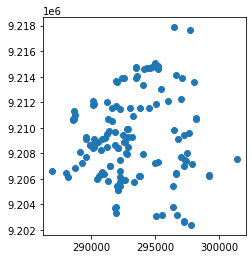

In [102]:
cidade = ox.geocoder.geocode_to_gdf('João Pessoa, Paraíba, Brasil', which_result=None, by_osmid=False, buffer_dist=None);
 
#ox.plot.plot_graph(cidade, ax=None, figsize=(8, 8), bgcolor='#111111', node_color='w', node_size=15, node_alpha=None, node_edgecolor='none', node_zorder=1, edge_color='#999999', edge_linewidth=1, edge_alpha=None, show=True, close=False, save=False, filepath=None, dpi=300, bbox=None);

cidade.plot(figsize=(20,20));
escolas = gpd.read_file("C:\\Users/firmi/OneDrive/Documentos/escolas31985.geojson");

escolas.plot();

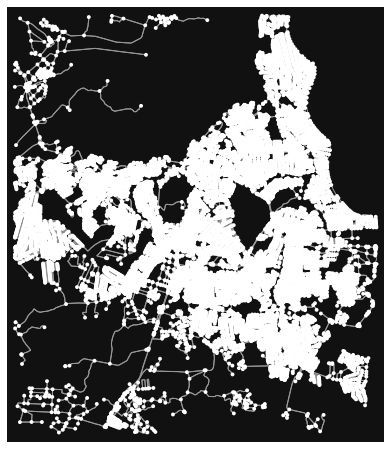

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [59]:
# Defining the map boundaries 
north, east, south, west = -7.050, -34.800, -7.250, -34.975   
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
ox.plot_graph(G)

In [60]:
# Displaying the 3rd node 
list(G.nodes(data=True))[2]

(337591192, {'y': -7.1104818, 'x': -34.8536208, 'street_count': 4})

In [61]:
# Displaying the 1st edge
list(G.edges(data=True))[1]

(324817308,
 3552601996,
 {'osmid': 356319614,
  'name': 'Rua Domésticas',
  'highway': 'residential',
  'oneway': False,
  'length': 286.70899999999995,
  'geometry': <shapely.geometry.linestring.LineString at 0x208f7f5c348>})

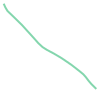

In [62]:
# Displaying the shape of edge using the geometry 
list(G.edges(data=True))[1][2]['geometry']

In [63]:
# define origin and desination locations 
origin_point = (-34.86974, -7.10056) 
destination_point = (-34.83813, -7.12331)# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)# printing the closest node id to origin and destination points 
origin_node, destination_node

C:\Users\firmi\anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\firmi\anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


(2951620902, 2951620902)

In [70]:
# Finding the optimal path 
#route = ox.shortest_path(G, origin_node, destination_node, weight = 'length') 
#route

trajeto

[670602798,
 7218056348,
 914627434,
 670602688,
 914627445,
 914627455,
 670602683,
 2765960112,
 914627578,
 914627889,
 2540728293,
 914627765,
 7217797202,
 914627728,
 914627704,
 914627642,
 914627665,
 2051903037,
 2051903009,
 1869443009,
 670602790,
 2051903044,
 618516881,
 618516883,
 618516882,
 618516872,
 618516912,
 618516904,
 618516898,
 7221488415,
 7185842513,
 618516847,
 7185842512,
 2106615024,
 598927459,
 598927460,
 337592897,
 598927452,
 598927453,
 598927448,
 598927380,
 598927367,
 598927359,
 598927360,
 508062190,
 2657589188,
 598927127,
 587649046,
 598927147,
 602379518,
 3089043388,
 602379493,
 602377327,
 595302045,
 7202427106,
 1869448535,
 1869448536,
 7202427102,
 7202427107,
 2538730221,
 458411573,
 1869448212,
 587649050,
 458403676,
 458399039,
 458409479,
 458409484]

In [114]:
# getting coordinates of the nodes# we will store the longitudes and latitudes in following list 
long = [] 
lat = []  
for i in trajeto:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [115]:
import plotly.graph_objects as go

In [116]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination    Returns
    -------
    Nothing. Only shows the map.
    """    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[0]],
        lat = [origin_point[1]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[0]],
        lat = [destination_point[1]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [117]:
plot_path(lat, long, origin_point, destination_point)

In [95]:
# Getting the start and end node of this part 
start_node=trajeto[-7] 
end_node=trajeto[-6]# Getting the edge connecting these nodes and storing it as a list in z to maintain the data structure of G.edges 
z = []  
for i in list(G.edges(data=True)):
     if (i[0]==start_node) & (i[1]==end_node):
         z.append(i)
 
z[0][2]

{'osmid': 245982670,
 'oneway': True,
 'name': 'Rua João Domingos',
 'highway': 'tertiary',
 'length': 71.24}

In [96]:
def node_list_to_path(G, node_list):
    """
    Given a list of nodes, return a list of lines that together
    follow the path
    defined by the list of nodes.
    Parameters
    ----------
    G : networkx multidigraph
    route : list
        the route as a list of nodes
    Returns
    -------
        lines : list of lines given as pairs ( (x_start, y_start), 
    (x_stop, y_stop) )
    """
    edge_nodes = list(zip(node_list[:-1], node_list[1:]))
    lines = []
    for u, v in edge_nodes:
        # if there are parallel edges, select the shortest in length
        data = min(G.get_edge_data(u, v).values(), 
                   key=lambda x: x['length'])
    
    # if it has a geometry attribute
        if 'geometry' in data:
            # add them to the list of lines to plot
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            # if it doesn't have a geometry attribute,
            # then the edge is a straight line from node to node
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
            
    return lines# getting the list of coordinates from the path 

lines = node_list_to_path(G, route)

long2 = []
lat2 = []

for i in range(len(lines)):
    z = list(lines[i])
    l1 = list(list(zip(*z))[0])
    l2 = list(list(zip(*z))[1])
    for j in range(len(l1)):
        long2.append(l1[j])
        lat2.append(l2[j])

In [97]:
print("Length of lat: ", len(lat))
print("Length of lat2: ", len(lat2))

Length of lat:  67
Length of lat2:  0


In [98]:
plot_path(lat2, long2, origin_point, destination_point)